<a href="https://colab.research.google.com/github/deepakgowtham/EVA4/blob/master/Week15/Notebooks/EVA4_Session15_Epoch_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!cd Dense_Depth; python train.py --epochs 6 --start-epoch 4

False
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2796: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
Epoch: [4][0/1326]	Time 18.147 (18.147)	Loss 0.5688 (0.5688)
Epoch: [4][1/1326]	Time 2.783 (20.930)	Loss 0.4745 (0.5216)
Epoch: [4][2/1326]	Time 2.713 (2

In [0]:
!cd Dense_Depth; python train.py --epochs 10 --start-epoch 6

False
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2796: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
Epoch: [6][0/1326]	Time 16.847 (16.847)	Loss 0.4702 (0.4702)
Epoch: [6][1/1326]	Time 2.784 (19.631)	Loss 0.3864 (0.4283)
Epoch: [6][2/1326]	Time 2.713 (2

In [0]:
!cd Dense_Depth; python train.py --epochs 10 --start-epoch 8

False
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2796: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
Epoch: [8][0/1326]	Time 16.859 (16.859)	Loss 0.6414 (0.6414)
Epoch: [8][1/1326]	Time 2.783 (19.642)	Loss 0.5614 (0.6014)
Epoch: [8][2/1326]	Time 2.716 (2

In [0]:
!cd Dense_Depth; python train.py --epochs 12 --start-epoch 10

False
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2796: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
Epoch: [10][0/1326]	Time 21.840 (21.840)	Loss 0.4772 (0.4772)
Epoch: [10][1/1326]	Time 3.380 (25.221)	Loss 0.4123 (0.4448)
Epoch: [10][2/1326]	Time 3.400

In [0]:
!cd Dense_Depth; python train.py --epochs 14 --start-epoch 12

Streaming output truncated to the last 5000 lines.
Epoch: [12][313/2652]	Time 2.326 (741.786)	Loss 0.0076 (0.0276)
Epoch: [12][314/2652]	Time 2.325 (744.111)	Loss 0.0076 (0.0276)
Epoch: [12][315/2652]	Time 2.325 (746.436)	Loss 0.0076 (0.0275)
Epoch: [12][316/2652]	Time 2.325 (748.761)	Loss 0.0075 (0.0274)
Epoch: [12][317/2652]	Time 2.325 (751.086)	Loss 0.0075 (0.0274)
Epoch: [12][318/2652]	Time 2.324 (753.410)	Loss 0.0075 (0.0273)
Epoch: [12][319/2652]	Time 2.325 (755.736)	Loss 0.0077 (0.0272)
Epoch: [12][320/2652]	Time 2.326 (758.062)	Loss 0.0078 (0.0272)
Epoch: [12][321/2652]	Time 2.328 (760.390)	Loss 0.0078 (0.0271)
Epoch: [12][322/2652]	Time 2.325 (762.715)	Loss 0.0077 (0.0271)
Epoch: [12][323/2652]	Time 2.323 (765.038)	Loss 0.0076 (0.0270)
Epoch: [12][324/2652]	Time 2.328 (767.366)	Loss 0.0076 (0.0269)
Epoch: [12][325/2652]	Time 2.326 (769.692)	Loss 0.0077 (0.0269)
Epoch: [12][326/2652]	Time 2.327 (772.019)	Loss 0.0080 (0.0268)
Epoch: [12][327/2652]	Time 2.323 (774.342)	Loss 0.007

In [0]:
!rm /content/Dense_Depth/pretrained_model/mask_save
#!cp /content/drive/My\ Drive/mask_save /content/Dense_Depth/pretrained_model
!cp /content/drive/My\ Drive/mask_save_Till_epoch6 /content/Dense_Depth/pretrained_model

rm: cannot remove '/content/Dense_Depth/pretrained_model/mask_save': No such file or directory


In [0]:
!rm -rf /content/Dense_Depth/output_mask
!rm -rf /content/Dense_Depth/output_depth
!mkdir /content/Dense_Depth/output_mask
!mkdir /content/Dense_Depth/output_depth

In [0]:
!cd Dense_Depth; python test.py --epochs 1

test.py:90: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = torch.autograd.Variable(image, volatile=True).cuda()
test.py:91: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  depth_ = torch.autograd.Variable(depth_, volatile=True).cuda(async=True)
/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of cuda is deprecated:
	cuda(torch.device device, bool async, *, torch.memory_format memory_format)
Consider using one of the following signatures instead:
	cuda(torch.device device, bool non_blocking, *, torch.memory_format memory_format)
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2796: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarn

In [0]:
!mkdir /content/drive/My\ Drive/output_epochs/epoch_6
!mkdir /content/drive/My\ Drive/output_epochs/epoch_6/output_depth
!mkdir /content/drive/My\ Drive/output_epochs/epoch_6/output_mask

In [0]:

source='/content/Dense_Depth/output_depth/'
dest ='/content/drive/My Drive/output_epochs/epoch_6/output_depth'
files = os.listdir(source)

for f in tqdm(files):
    shutil.copy(source+f, dest)


100%|██████████| 25/25 [00:00<00:00, 134.40it/s]


In [0]:
source='/content/Dense_Depth/output_mask/'
dest ='/content/drive/My Drive/output_epochs/epoch_6/output_mask/'
files = os.listdir(source)

for f in tqdm(files):
    shutil.copy(source+f, dest)

100%|██████████| 25/25 [00:00<00:00, 104.32it/s]


In [0]:

source='/content/Dense_Depth'
dest ='/content/drive/My Drive/Dense_Depth'
#files = os.listdir(source)

#for f in tqdm(files):
shutil.copytree(source, dest)

'/content/drive/My Drive/Dense_Depth'

In [0]:
x=pd.read_csv('/content/Data/Mask_RCNN/train.csv', header=None,skiprows=[0])
x.head()

,0,1
0,/content/Data/Mask_RCNN/fg_bg/bg_43fg_68_flip_...,/content/Data/Mask_RCNN/Depth_output/bg_43fg_6...
1,/content/Data/Mask_RCNN/fg_bg/bg_102fg_67_flip...,/content/Data/Mask_RCNN/Depth_output/bg_102fg_...
2,/content/Data/Mask_RCNN/fg_bg/bg_13fg_96_flip_...,/content/Data/Mask_RCNN/Depth_output/bg_13fg_9...
3,/content/Data/Mask_RCNN/fg_bg/bg_102fg_103_fli...,/content/Data/Mask_RCNN/Depth_output/bg_102fg_...
4,/content/Data/Mask_RCNN/fg_bg/bg_61fg_79_flip_...,/content/Data/Mask_RCNN/Depth_output/bg_61fg_7...


In [0]:
!cp -rp /content/Dense_Depth /content/drive/My\ Drive

In [0]:
import torch, numpy as np
x=torch.tensor(np.array([[1, 2, 3], [4, 5, 6]])).float()
x.mean()

tensor(3.5000)

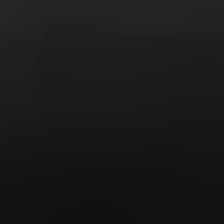

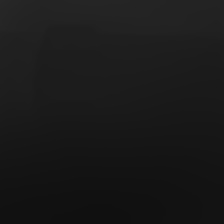

(224, 224) L (224, 224) RGB (224, 224) RGB


In [0]:
import PIL
from PIL import Image
depth = Image.open('/content/Data/Mask_RCNN/Depth_output/bg_48fg_32_3.jpg')
depth1 = depth.convert("RGB")
display(depth)
display(depth1)


img = Image.open('/content/Data/Mask_RCNN/fg_bg/bg_48fg_32_3.jpg')
print(depth.size,depth.mode,img.size,img.mode,depth1.size,depth1.mode)

In [0]:
test=('a', 'b')

In [0]:
if test:
  print('yes')

yes


In [0]:
test[0]

'a'

In [0]:
import PIL
import torchvision
from PIL import Image
mask = Image.open('/content/Dense_Depth/output_mask/mask_11.jpg')

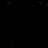

In [0]:
mask

In [0]:
depth=Image.open('/content/Dense_Depth/output_depth/depth_11.jpg')
depth

In [0]:
trans = torchvision.transforms.ToPILImage()
trans1 = torchvision.transforms.ToTensor()

In [0]:
conv=trans1(mask)

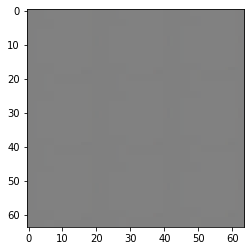

In [0]:
plt.imshow(conv.view(64,64,3).numpy())
plt.show()

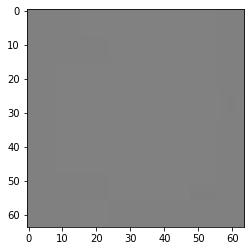

In [0]:
import matplotlib.pyplot as plt
plt.imshow(trans(trans1(mask)),cmap='plasma')

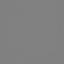

In [0]:
im = torchvision.transforms.ToPILImage()(conv).convert('RGB')
display(im)

In [0]:
dep=Image.open('/content/Dense_Depth/output_depth/depth_14.jpg')
dept=trans1(dep)

In [0]:
dept.max()

tensor(1.)

In [0]:
#!zip -r output_depth.zip /content/Dense_Depth/output_depth
#!zip -r output_mask.zip /content/Dense_Depth/output_mask
!zip -r dense_depth.zip /content/Dense_Depth

  adding: content/Dense_Depth/ (stored 0%)
  adding: content/Dense_Depth/LICENSE (deflated 41%)
  adding: content/Dense_Depth/__pycache__/ (stored 0%)
  adding: content/Dense_Depth/__pycache__/sobel.cpython-36.pyc (deflated 36%)
  adding: content/Dense_Depth/__pycache__/net_mask.cpython-36.pyc (deflated 61%)
  adding: content/Dense_Depth/__pycache__/util.cpython-36.pyc (deflated 55%)
  adding: content/Dense_Depth/__pycache__/loaddata.cpython-36.pyc (deflated 41%)
  adding: content/Dense_Depth/__pycache__/nyu_transform.cpython-36.pyc (deflated 59%)
  adding: content/Dense_Depth/output_mask/ (stored 0%)
  adding: content/Dense_Depth/output_mask/mask_16.jpg (deflated 4%)
  adding: content/Dense_Depth/output_mask/mask_22.jpg (deflated 6%)
  adding: content/Dense_Depth/output_mask/mask_18.jpg (deflated 2%)
  adding: content/Dense_Depth/output_mask/mask_11.jpg (deflated 2%)
  adding: content/Dense_Depth/output_mask/mask_23.jpg (deflated 5%)
  adding: content/Dense_Depth/output_mask/mask_24.j

In [0]:
import torch
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

In [0]:
import os

os.chdir('/content/Dense_Depth')
import argparse

import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn

from models import modules, net, resnet, densenet, senet
import net_mask
import loaddata
import util
import numpy as np
from torchvision.utils import save_image
from torchvision.transforms import ToPILImage

import os
import matplotlib
import matplotlib.image
from PIL import Image
from matplotlib.pyplot import imshow
matplotlib.rcParams['image.cmap'] = 'viridis'

import pdb


In [0]:
def define_model(encoder='resnet'):
    if encoder is 'resnet':
        original_model = resnet.resnet50(pretrained = True)
        Encoder = modules.E_resnet(original_model) 
        model = net.model(Encoder, num_features=2048, block_channel = [256, 512, 1024, 2048])
    if encoder is 'densenet':
        original_model = densenet.densenet161(pretrained=True)
        Encoder = modules.E_densenet(original_model)
        model = net.model(Encoder, num_features=2208, block_channel = [192, 384, 1056, 2208])
    if encoder is 'senet':
        original_model = senet.senet154(pretrained='imagenet')
        Encoder = modules.E_senet(original_model)
        model = net.model(Encoder, num_features=2048, block_channel = [256, 512, 1024, 2048])

    return model
   

In [0]:
model_selection = 'resnet'
model = define_model(encoder = model_selection)
original_model2 = net_mask.drn_d_22(pretrained=False)
model2 = net_mask.AutoED(original_model2)  
 
model = torch.nn.DataParallel(model).cuda()
model2 = torch.nn.DataParallel(model2).cuda()

model.load_state_dict(torch.load('./pretrained_model/model_' + model_selection))
model2.load_state_dict(torch.load('./pretrained_model/mask_save'))


<All keys matched successfully>

In [0]:
!pip install torchsummary
from torchsummary import summary

In [0]:
summary(model, input_size=(3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           9,408
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
         MaxPool2d-4           [-1, 64, 16, 16]               0
            Conv2d-5           [-1, 64, 16, 16]           4,096
       BatchNorm2d-6           [-1, 64, 16, 16]             128
              ReLU-7           [-1, 64, 16, 16]               0
            Conv2d-8           [-1, 64, 16, 16]          36,864
       BatchNorm2d-9           [-1, 64, 16, 16]             128
             ReLU-10           [-1, 64, 16, 16]               0
           Conv2d-11          [-1, 256, 16, 16]          16,384
      BatchNorm2d-12          [-1, 256, 16, 16]             512
           Conv2d-13          [-1, 256, 16, 16]          16,384
      BatchNorm2d-14          [-1, 256,

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2796: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [0]:
print(model2)

DataParallel(
  (module): AutoED(
    (E): _E(
      (base): Sequential(
        (0): Sequential(
          (0): Conv2d(3, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False)
          (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Sequential(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (2): Sequential(
          (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (3): Sequential(
          (0): BasicBlock(
            (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      

In [0]:
summary(original_model2.cuda(), (3,1024,1024))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1       [-1, 16, 1024, 1024]           2,352
       BatchNorm2d-2       [-1, 16, 1024, 1024]              32
              ReLU-3       [-1, 16, 1024, 1024]               0
            Conv2d-4       [-1, 16, 1024, 1024]           2,304
       BatchNorm2d-5       [-1, 16, 1024, 1024]              32
              ReLU-6       [-1, 16, 1024, 1024]               0
            Conv2d-7         [-1, 32, 512, 512]           4,608
       BatchNorm2d-8         [-1, 32, 512, 512]              64
              ReLU-9         [-1, 32, 512, 512]               0
           Conv2d-10         [-1, 64, 256, 256]          18,432
      BatchNorm2d-11         [-1, 64, 256, 256]             128
             ReLU-12         [-1, 64, 256, 256]               0
           Conv2d-13         [-1, 64, 256, 256]          36,864
      BatchNorm2d-14         [-1, 64, 2

In [0]:
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        img1[i,j]=255 if img1[i, j] >= 2 else 0
print(img1.shape)

In [0]:

#img=Image.open('/content/Dense_Depth/output_mask/mask_11.jpg','r')
#imshow(np.asarray(img)*255,cmap='gray')
#np.asarray(img).max()


img1=cv2.imread('/content/Dense_Depth/output_mask/mask_6.jpg',0)
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        img1[i,j]=255 if img1[i, j] >= 2 else 0
print(img1.shape)

plt.imshow(img1,cmap='gray')

AttributeError: ignored

In [0]:
train_list

['/content/Data/Mask_RCNN/Depth_output/bg_48fg_32_3.jpg',
 '/content/Data/Mask_RCNN/Depth_output/bg_2fg_52_flip_8.jpg',
 '/content/Data/Mask_RCNN/Depth_output/bg_15fg_64_flip_16.jpg',
 '/content/Data/Mask_RCNN/Depth_output/bg_29fg_87_8.jpg',
 '/content/Data/Mask_RCNN/Depth_output/bg_2fg_7_flip_16.jpg',
 '/content/Data/Mask_RCNN/Depth_output/bg_93fg_7_flip_18.jpg',
 '/content/Data/Mask_RCNN/Depth_output/bg_61fg_33_20.jpg',
 '/content/Data/Mask_RCNN/Depth_output/bg_57fg_57_18.jpg',
 '/content/Data/Mask_RCNN/Depth_output/bg_12fg_19_flip_7.jpg',
 '/content/Data/Mask_RCNN/Depth_output/bg_20fg_8_flip_2.jpg',
 '/content/Data/Mask_RCNN/Depth_output/bg_91fg_19_flip_12.jpg',
 '/content/Data/Mask_RCNN/Depth_output/bg_32fg_6_flip_18.jpg',
 '/content/Data/Mask_RCNN/Depth_output/bg_60fg_39_flip_6.jpg',
 '/content/Data/Mask_RCNN/Depth_output/bg_12fg_46_flip_12.jpg',
 '/content/Data/Mask_RCNN/Depth_output/bg_58fg_44_flip_1.jpg',
 '/content/Data/Mask_RCNN/Depth_output/bg_5fg_5_flip_7.jpg',
 '/content/D

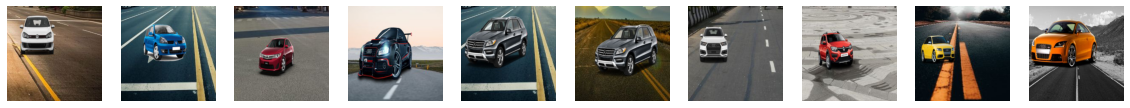

In [0]:
import pandas as pd

train_df=pd.read_csv('/content/Data/Mask_RCNN/test1.csv')
train_list=list(train_df.input_path.values)
from skimage import io
fig= plt.figure(figsize=(20, 30))
for i in range(10):
  ax=fig.add_subplot(1,10, i+1)
  ax.imshow( io.imread(train_list[i]) )
  #ax.set_title(str(f'fg_{i+1}.jpg'))
  plt.axis('off')

plt.show()

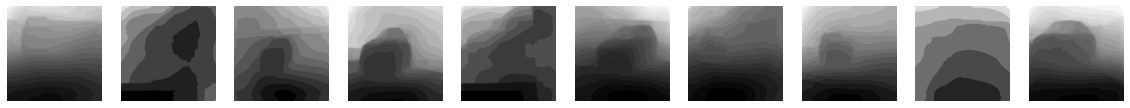

In [0]:
import pandas as pd

train_df=pd.read_csv('/content/Data/Mask_RCNN/test1.csv')
train_list=list(train_df.depth_path.values)
from skimage import io
fig= plt.figure(figsize=(20, 30))
for i in range(10):
  ax=fig.add_subplot(1,10, i+1)
  ax.imshow( io.imread(train_list[i]), cmap='gray' )
  #ax.set_title(str(f'fg_{i+1}.jpg'))
  plt.axis('off')
plt.savefig('fg.jpg')
plt.show()

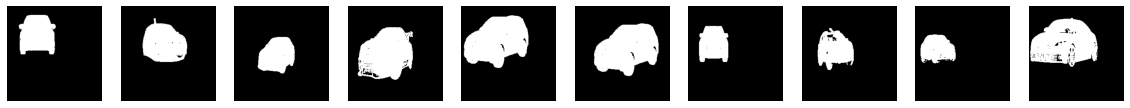

In [0]:
import pandas as pd

train_df=pd.read_csv('/content/Data/Mask_RCNN/test1.csv')
train_list=list(train_df.depth_path.values)
mask_list=[]
for item in train_list:
  new_item = item.replace("Depth_output", "fg_bg_mask")
  mask_list.append(new_item)
from skimage import io
fig= plt.figure(figsize=(20, 30))
for i in range(10):
  ax=fig.add_subplot(1,10, i+1)
  ax.imshow( io.imread(mask_list[i]), cmap='gray' )
  #ax.set_title(str(f'fg_{i+1}.jpg'))
  plt.axis('off')
plt.savefig('fg.jpg')
plt.show()

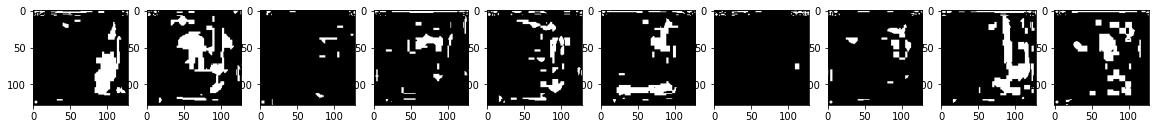

In [0]:
import os
mask_list=os.listdir('/content/drive/My Drive/output_epochs/epoch_6/output_mask')
mask_list.sort(key=lambda f: int(re.sub('\D', '', f)))
fig= plt.figure(figsize=(20, 30))
for i in range(10):
  img1=cv2.imread('/content/drive/My Drive/output_epochs/epoch_6/output_mask/'+mask_list[i],0)
  for ii in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        img1[ii,j]=255 if img1[ii, j] >= 2 else 0
  ax=fig.add_subplot(1,10, i+1)
  ax.imshow( img1 ,cmap='gray')
plt.show()

  

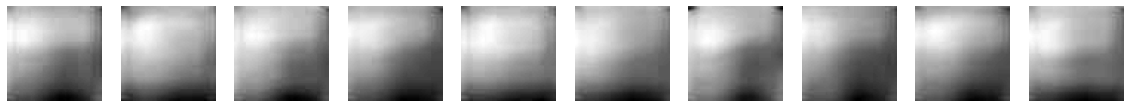

In [0]:
import os
import re
path='/content/drive/My Drive/output_epochs/epoch_6/output_depth/'
mask_list=os.listdir(path)
mask_list.sort(key=lambda f: int(re.sub('\D', '', f)))
from skimage import io
fig= plt.figure(figsize=(20, 30))
for i in range(10):
  ax=fig.add_subplot(1,10, i+1)
  ax.imshow( io.imread(path+mask_list[i]),cmap='gray' )
  #ax.set_title(str(f'fg_{i+1}.jpg'))
  plt.axis('off')

plt.show()

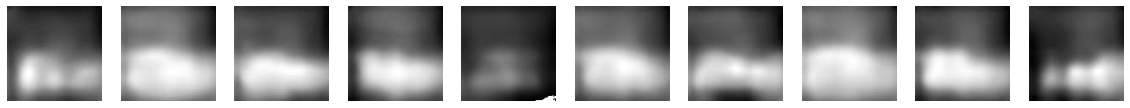

In [0]:
import os
path='/content/drive/My Drive/output_epochs/epoch_14_224/output_depth/'
mask_list=os.listdir(path)
#mask_list.sort()
from skimage import io
fig= plt.figure(figsize=(20, 30))
for i in range(10):
  ax=fig.add_subplot(1,10, i+1)
  ax.imshow( io.imread(path+mask_list[i]),cmap='gray' )
  #ax.set_title(str(f'fg_{i+1}.jpg'))
  plt.axis('off')

plt.show()

In [0]:
mask_list

['depth_0.jpg',
 'depth_1.jpg',
 'depth_10.jpg',
 'depth_11.jpg',
 'depth_12.jpg',
 'depth_13.jpg',
 'depth_14.jpg',
 'depth_15.jpg',
 'depth_16.jpg',
 'depth_17.jpg',
 'depth_18.jpg',
 'depth_19.jpg',
 'depth_2.jpg',
 'depth_20.jpg',
 'depth_21.jpg',
 'depth_22.jpg',
 'depth_23.jpg',
 'depth_24.jpg',
 'depth_3.jpg',
 'depth_4.jpg',
 'depth_5.jpg',
 'depth_6.jpg',
 'depth_7.jpg',
 'depth_8.jpg',
 'depth_9.jpg']